In [ ]:
!pip install nltk
!pip install spacy
!python -m spacy download en_core_web_md

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2023-03-24 10:49:19.276821: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-24 10:49:21.928837: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-03-24 10:

# **Necesary libraries**

In [ ]:
import pandas as pd
import numpy as np
import json
import nltk
import gensim.downloader as api
from gensim import corpora
from nltk.tokenize import word_tokenize
from scipy.spatial.distance import cosine
import heapq
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import requests
import re
import string
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import requests
import tempfile
import matplotlib.cm as cm
import matplotlib as plt
import matplotlib.colors as colors
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# **Process the data**

In [ ]:
# import the json data as dataframe
with open('articles.json', 'r') as file:
  articles_data = pd.read_json(file).transpose()

with open('videos.json', 'r') as file:
  videos_data = pd.read_json(file).transpose()

In [ ]:
videos_data.head()

,url,text,categoriaIAB,keywords
pre-b42video10,https://contextual-repo.tappx.net/B42/B42video...,Las oposiciones a maestro en la Comunidad de M...,[{'class': 'Education'}],"[oposiciones a maestro, Comunidad de Madrid, c..."
pre-b42video31,https://contextual-repo.tappx.net/B42/B42video...,Ya empieza a aprender y vais a poder encontrar...,[{'class': 'Shopping'}],"[, Ofertas, precios bajos, sorpresas, Amazon, ..."
pre-b42video13,https://contextual-repo.tappx.net/B42/B42video...,La salud esta especialmente relacionada con la...,[{'class': 'Health & Fitness'}],"[, Alimentacion, Alimentos, Dieta, Nutricionis..."
pre-b42video25,https://contextual-repo.tappx.net/B42/B42video...,Las primeras imagenes del telescopio espacial ...,"[{'class': 'Science'}, {'class': 'Technology &...","[Telescopio espacial James Webb, NASA, Astrono..."
pre-b42video8,https://contextual-repo.tappx.net/B42/B42video...,Esta campana de las becas simplemente correspo...,[{'class': 'Politics'}],"[campana de becas, San chismoso, hombre, mujer..."


In [ ]:
articles_data.head()

,title,keywords,categoriaIAB,text,url
5fb1b862-7965-4d0f-a243-9a8272e28e0f,La triste historia del submarino espanol que n...,"[S, 80, Armada Espanola, submarinos, renovar f...","[{'class': 'News'}, {'class': 'Technology & Co...",La triste historia del submarino espanol que n...,https://www.dw.com/es/la-triste-historia-del-s...
bbcdc963-b065-48a0-b0c6-9fac54abfb6b,Esto fue lo que dijo la mama de Pique sobre Cl...,"[Montserrat Bernabeu, novia de su hijo, mujer ...",[{'class': 'Arts & Entertainment'}],Esto fue lo que dijo la mama de Pique sobre Cl...,https://www.crhoy.com/entretenimiento/esto-fue...
2c6b3a81-3d8e-44ac-b35e-f2d337526c9a,Los 10 coches mas vendidos en 2020,"[coches vendidos, Dacia Sandero, SEAT Leon, Ni...",[{'class': 'Automotive'}],Los 10 coches mas vendidos en 2020\n\nEn el an...,https://www.motor.es/noticias/coches-mas-vendi...
5fce3e45-1fd8-423f-918c-ed314bece7df,Examenes finales y graduaciones? Atencion a es...,"[examenes finales, proyectos de reposicion, am...",[{'class': 'Education'}],Examenes finales y graduaciones? Atencion a es...,https://www.crhoy.com/nacionales/cuando-son-lo...
0d14ef46-8463-4901-98e5-639c8d3f8d5e,Los nombres de bebe que seran tendencia en 2023,"[, Lucia, Hugo, Maria, Carmen, Antonio, Zuleya...","[{'class': 'Family & Parenting'}, {'class': 'E...",Los nombres de bebe que seran tendencia en 202...,https://saposyprincesas.elmundo.es/consejos/ac...


# **Extract the information to be analyzed**

***keywords***

In [ ]:
# extract keyword data
dict_articles_keywords = articles_data['keywords'].to_dict()
dict_videos_keywords = videos_data['keywords'].to_dict()

***text***

In [ ]:
# extract text data
dict_articles_texts = articles_data['text'].to_dict()
dict_videos_texts = videos_data['text'].to_dict()

***categoriaIAB***

In [ ]:
# extract category data
dict_articles_IAB = articles_data['categoriaIAB'].to_dict()
dict_videos_IAB = videos_data['categoriaIAB'].to_dict()

***title***

In [ ]:
# extract title data
dict_articles_title = articles_data['title'].to_dict()

# **Similarity**

In [ ]:
# clean text data, remove urls and stopwords
def clean_text(text):
  
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    words = word_tokenize(text, language="spanish")
    stop_words = set(stopwords.words("spanish"))
    words = [word for word in words if word not in stop_words]
    stemmer = SnowballStemmer('spanish')
    words = [stemmer.stem(word) for word in words]
    text = ' '.join(words)
    return text

In [ ]:
# find text similarity
def compute_similarity(text1, text2):
    cleaned_text1 = clean_text(text1)
    cleaned_text2 = clean_text(text2)
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform([cleaned_text1, cleaned_text2])
    similarity = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2])
    return similarity[0][0]

In [ ]:
# create dataframe for categories
def create_dataframe_categories(videos_data, articles_data):
    video_categories = [set([entry['class'] for entry in video_info]) for video_info in videos_data.values()]
    article_categories = [set([entry['class'] for entry in article_info]) for article_info in articles_data.values()]
    matrix = [[0 for _ in range(len(video_categories))] for _ in range(len(article_categories))]
    for j, article_cat in enumerate(article_categories):
        for i, video_cat in enumerate(video_categories):
            shared_classes = len(video_cat.intersection(article_cat))
            total_classes = len(video_cat.union(article_cat))
            if shared_classes == 0:
                matrix[j][i] = 0
            elif shared_classes < total_classes:
                matrix[j][i] = 0.5
            else:
                matrix[j][i] = 1

    # Create DataFrame with index and column names
    df = pd.DataFrame(matrix, index=articles_data.keys(), columns=videos_data.keys())

    return df

In [ ]:
# in the dataframe, show scores under 0,6 as FALSE; this is done just for visualization purposes
def set_to_false(x):
    if x < 0.6:
        return False
    else:
        return x

In [ ]:
# in the dataframe, highlight the cell with the highest similarity score in green
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: green' if v else '' for v in is_max]

***keywords***

In [ ]:
# join all keyword values in a string
for key, value in dict_articles_keywords.items():
    dict_articles_keywords[key] = ' '.join(value)
for key, value in dict_videos_keywords.items():
    dict_videos_keywords[key] = ' '.join(value)

In [ ]:
# find the similarity between every combination of keywords
similarity_matrix_kw = [[0 for j in range(len(dict_videos_keywords))] for i in range(len(dict_articles_keywords))]
for i, text1 in enumerate(dict_articles_keywords.values()):
    for j, text2 in enumerate(dict_videos_keywords.values()):
        similarity = compute_similarity(text1, text2)
        similarity_matrix_kw[i][j] = similarity

In [ ]:
# create a DataFrame with similarity values and keys as labels
similarity_df_kw = pd.DataFrame(similarity_matrix_kw, index=list(dict_articles_texts.keys()), columns=list(dict_videos_texts.keys()))
dataframe_keywords = similarity_df_kw.style.apply(highlight_max, axis=1)

In [ ]:
dataframe_keywords

,pre-b42video10,pre-b42video31,pre-b42video13,pre-b42video25,pre-b42video8,pre-b42video11,pre-b42video30,pre-b42video2,pre-b42video12,pre-b42video20,pre-b42video28,pre-b42video27,pre-b42video34,pre-b42video33,pre-b42video16,pre-b42video36,pre-b42video23,pre-b42video6,pre-b42video39,pre-b42video19,pre-b42video18,pre-b42video38,pre-b42video7,pre-b42video1,pre-b42video3,pre-b42video32,pre-b42video9,pre-b42video5,pre-b42video4,pre-b42video29,pre-b42video35,pre-b42video24,pre-b42video22,pre-b42video17,pre-b42video37,pre-b42video14,pre-b42video26,pre-b42video21,pre-b42video15
5fb1b862-7965-4d0f-a243-9a8272e28e0f,0.000000,0.000000,0.000000,0.014393,0.000000,0.000000,0.000000,0.000000,0.000000,0.023857,0.011536,0.018149,0.000000,0.000000,0.011938,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.042323,0.000000,0.000000,0.000000,0.013335,0.000000,0.000000,0.015375,0.000000,0.000000,0.009535,0.000000,0.034558,0.000000
bbcdc963-b065-48a0-b0c6-9fac54abfb6b,0.000000,0.000000,0.000000,0.027608,0.041564,0.000000,0.000000,0.000000,0.057294,0.034168,0.000000,0.000000,0.000000,0.000000,0.022863,0.000000,0.000000,0.018156,0.000000,0.012962,0.000000,0.000000,0.023338,0.006696,0.000000,0.000000,0.012962,0.000000,0.000000,0.012614,0.000000,0.036256,0.000000,0.000000,0.000000,0.018162,0.016380,0.041221,0.000000
2c6b3a81-3d8e-44ac-b35e-f2d337526c9a,0.000000,0.000000,0.000000,0.000000,0.009572,0.010095,0.000000,0.000000,0.004298,0.015982,0.000000,0.000000,0.000000,0.008805,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010582,0.016576,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008321,0.010330,0.027984,0.000000,0.000000,0.000000,0.028886,0.000000
5fce3e45-1fd8-423f-918c-ed314bece7df,0.053375,0.000000,0.000000,0.000000,0.000000,0.033285,0.000000,0.019147,0.006967,0.039553,0.012563,0.000000,0.000000,0.000000,0.013001,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.046265,0.046154,0.000000,0.009019,0.000000,0.000000,0.000000,0.016744,0.014786,0.000000,0.000000,0.058795,0.009145,0.000000
0d14ef46-8463-4901-98e5-639c8d3f8d5e,0.000000,0.006659,0.005632,0.000000,0.009488,0.000000,0.000000,0.011709,0.004261,0.000000,0.000000,0.000000,0.000000,0.000000,0.032737,0.000000,0.010362,0.000000,0.000000,0.000000,0.011203,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005515,0.000000,0.000000,0.000000,0.000000,0.018322,0.000000,0.000000,0.000000,0.005592,0.000000
d95cde78-1dbf-48f8-b51c-17dfc6ce09db,0.024982,0.000000,0.022986,0.007477,0.071013,0.023806,0.014040,0.009134,0.003324,0.006116,0.000000,0.000000,0.000000,0.027973,0.006202,0.000000,0.016462,0.000000,0.000000,0.000000,0.000000,0.000000,0.026096,0.000000,0.008503,0.007119,0.007119,0.005143,0.000000,0.000000,0.000000,0.019581,0.016110,0.029028,0.000000,0.169109,0.000000,0.017680,0.048628
8f123a09-d173-47f3-a1d9-841c9e0798ce,0.000000,0.000000,0.037634,0.000000,0.000000,0.010785,0.000000,0.000000,0.000000,0.000000,0.008280,0.013027,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025428,0.000000,0.050094,0.000000,0.000000,0.010200,0.011748,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.018219
e6eb2bc5-2b5a-43c7-ad23-28fe4dd28e88,0.009215,0.000000,0.000000,0.017012,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.013633,0.000000,0.000000,0.007668,0.000000,0.250302,0.000000,0.059005,0.010132,0.000000,0.019890,0.000000,0.000000,0.000000,0.019346,0.008018,0.008018,0.024057,0.009740,0.000000,0.027826,0.000000,0.000000,0.000000,0.037047,0.000000,0.010132,0.000000,0.000000
fa845d01-d559-42e4-ba6f-3ac8cf19a179,0.012655,0.000000,0.000000,0.000000,0.011447,0.000000,0.000000,0.000000,0.005140,0.019102,0.009269,0.000000,0.000000,0.000000,0.009592,0.000000,0.000000,0.007627,0.000000,0.000000,0.000000,0.000000,0.019825,0.029052,0.000000,0.000000,0.045528,0.016049,0.006654,0.000000,0.000000,0.0

***text***

In [ ]:
# find the similarity between every combination of texts
similarity_matrix = [[0 for j in range(len(dict_videos_texts))] for i in range(len(dict_articles_texts))]
for i, text1 in enumerate(dict_articles_texts.values()):
    for j, text2 in enumerate(dict_videos_texts.values()):
        similarity = compute_similarity(text1, text2)
        similarity_matrix[i][j] = similarity

In [ ]:
# create a DataFrame with similarity values and keys as labels
similarity_df = pd.DataFrame(similarity_matrix, index=list(dict_articles_texts.keys()), columns=list(dict_videos_texts.keys()))
dataframe_texts = similarity_df.style.apply(highlight_max, axis=1)

In [ ]:
# display the DataFrame
dataframe_texts

,pre-b42video10,pre-b42video31,pre-b42video13,pre-b42video25,pre-b42video8,pre-b42video11,pre-b42video30,pre-b42video2,pre-b42video12,pre-b42video20,pre-b42video28,pre-b42video27,pre-b42video34,pre-b42video33,pre-b42video16,pre-b42video36,pre-b42video23,pre-b42video6,pre-b42video39,pre-b42video19,pre-b42video18,pre-b42video38,pre-b42video7,pre-b42video1,pre-b42video3,pre-b42video32,pre-b42video9,pre-b42video5,pre-b42video4,pre-b42video29,pre-b42video35,pre-b42video24,pre-b42video22,pre-b42video17,pre-b42video37,pre-b42video14,pre-b42video26,pre-b42video21,pre-b42video15
5fb1b862-7965-4d0f-a243-9a8272e28e0f,0.045087,0.104783,0.049873,0.063804,0.024558,0.104392,0.078069,0.053178,0.063125,0.064872,0.057366,0.089090,0.065885,0.053176,0.061057,0.038521,0.054913,0.080002,0.035347,0.048143,0.061294,0.046879,0.078549,0.041029,0.058814,0.127381,0.030159,0.076254,0.082336,0.076164,0.042575,0.082124,0.088692,0.034451,0.046875,0.081523,0.049619,0.071479,0.068816
bbcdc963-b065-48a0-b0c6-9fac54abfb6b,0.073551,0.080535,0.053982,0.045132,0.071084,0.084235,0.033375,0.072199,0.080384,0.056664,0.037947,0.074777,0.044963,0.026830,0.055473,0.038072,0.052478,0.066594,0.032617,0.052341,0.063651,0.036864,0.083255,0.043957,0.056400,0.050571,0.032582,0.080878,0.072872,0.080414,0.036464,0.109030,0.058765,0.039166,0.041941,0.104363,0.081135,0.079350,0.049170
2c6b3a81-3d8e-44ac-b35e-f2d337526c9a,0.052770,0.122525,0.071377,0.119800,0.042602,0.117141,0.108593,0.067386,0.106116,0.070864,0.023252,0.095228,0.052812,0.050531,0.097211,0.067299,0.081941,0.104801,0.061847,0.054226,0.123495,0.082322,0.092592,0.046900,0.081297,0.059265,0.024251,0.080292,0.161439,0.110625,0.057478,0.068844,0.096579,0.051972,0.101203,0.064713,0.075448,0.113987,0.108447
5fce3e45-1fd8-423f-918c-ed314bece7df,0.058782,0.042369,0.065568,0.032262,0.017388,0.083739,0.049361,0.033573,0.056466,0.039230,0.016024,0.040946,0.065540,0.029659,0.052547,0.025535,0.026566,0.049454,0.023392,0.040887,0.043201,0.044511,0.056590,0.026597,0.025136,0.098797,0.057100,0.047128,0.052873,0.073287,0.039927,0.073229,0.066616,0.027437,0.038971,0.066526,0.043537,0.040892,0.047727
0d14ef46-8463-4901-98e5-639c8d3f8d5e,0.049525,0.118083,0.106770,0.117122,0.057560,0.166702,0.102991,0.108196,0.064495,0.063642,0.042216,0.099824,0.117312,0.040796,0.095248,0.070299,0.122817,0.105464,0.057355,0.083445,0.134640,0.068406,0.064227,0.082845,0.097235,0.033738,0.023168,0.123965,0.142381,0.101284,0.078358,0.109982,0.156034,0.056630,0.123488,0.108571,0.095150,0.075309,0.077055
d95cde78-1dbf-48f8-b51c-17dfc6ce09db,0.083780,0.111524,0.171793,0.063312,0.068875,0.162157,0.105970,0.128708,0.105137,0.098619,0.059089,0.127836,0.126266,0.061971,0.132421,0.076809,0.122732,0.143089,0.068146,0.103183,0.149491,0.097671,0.105599,0.072166,0.064985,0.068602,0.061109,0.131702,0.115429,0.164914,0.095491,0.148760,0.152099,0.085464,0.073848,0.240909,0.099100,0.074906,0.094559
8f123a09-d173-47f3-a1d9-841c9e0798ce,0.052280,0.086595,0.094511,0.057502,0.024787,0.087432,0.081141,0.071220,0.041172,0.041874,0.031242,0.081740,0.053107,0.017843,0.055672,0.085991,0.059417,0.057618,0.125561,0.069796,0.188760,0.083160,0.059223,0.049171,0.072389,0.030087,0.028963,0.095926,0.069232,0.061672,0.040061,0.068008,0.093941,0.045340,0.107184,0.054713,0.046334,0.057635,0.074198
e6eb2bc5-2b5a-43c7-ad23-28fe4dd28e88,0.081658,0.078638,0.074694,0.056575,0.038110,0.105778,0.090092,0.077913,0.057653,0.063171,0.040995,0.115053,0.072902,0.036925,0.092497,0.242782,0.068458,0.107838,0.083361,0.076336,0.116903,0.104989,0.087268,0.060959,0.075934,0.053482,0.047408,0.140540,0.076874,0.089231,0.045905,0.072685,0.129733,0.056402,0.144968,0.057296,0.066465,0.048195,0.045418
fa845d01-d559-42e4-ba6f-3ac8cf19a179,0.070424,0.142796,0.052555,0.064240,0.057203,0.093599,0.091627,0.041985,0.082209,0.066003,0.040762,0.053459,0.064414,0.039813,0.059992,0.027395,0.058575,0.082770,0.065697,0.061930,0.067712,0.043827,0.085534,0.085973,0.050729,0.057027,0.042920,0.079233,0.098132,0.083720,0.045914,0.0

***categories***

In [ ]:
# create a DataFrame with similarity values and keys as labels
dataframe_categories = create_dataframe_categories(dict_videos_IAB, dict_articles_IAB)

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

dataframe_categories

,pre-b42video10,pre-b42video31,pre-b42video13,pre-b42video25,pre-b42video8,pre-b42video11,pre-b42video30,pre-b42video2,pre-b42video12,pre-b42video20,pre-b42video28,pre-b42video27,pre-b42video34,pre-b42video33,pre-b42video16,pre-b42video36,pre-b42video23,pre-b42video6,pre-b42video39,pre-b42video19,pre-b42video18,pre-b42video38,pre-b42video7,pre-b42video1,pre-b42video3,pre-b42video32,pre-b42video9,pre-b42video5,pre-b42video4,pre-b42video29,pre-b42video35,pre-b42video24,pre-b42video22,pre-b42video17,pre-b42video37,pre-b42video14,pre-b42video26,pre-b42video21,pre-b42video15
5fb1b862-7965-4d0f-a243-9a8272e28e0f,0.0,0,0,0.5,0,0.0,0.5,0,0.5,0.0,0.0,0,0.0,0,0,0.0,0,0.5,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0,0.5,0.0,0,0,0.0,0.0,0,0,0,0
bbcdc963-b065-48a0-b0c6-9fac54abfb6b,0.0,0,0,0.0,0,0.0,0.0,0,0.0,0.0,0.5,0,0.0,0,0,0.5,0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0.0,0.0,0,0,0.0,0.5,0,0,0,0
2c6b3a81-3d8e-44ac-b35e-f2d337526c9a,0.0,0,0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,1,0.0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0,0.0,0.0,0,0,0,0
5fce3e45-1fd8-423f-918c-ed314bece7df,1.0,0,0,0.0,0,1.0,0.0,0,0.0,0.0,0.0,0,0.5,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0,0.0,0.5,0,0,0.0,0.5,0,0,0,0
0d14ef46-8463-4901-98e5-639c8d3f8d5e,0.5,0,0,0.0,0,0.5,0.0,0,0.0,0.0,0.0,0,1.0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0,0.0,1.0,0,0,0.0,0.5,0,0,0,0
d95cde78-1dbf-48f8-b51c-17dfc6ce09db,0.0,0,1,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0,0.0,0.0,1,0,0,1
8f123a09-d173-47f3-a1d9-841c9e0798ce,0.0,0,0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0,1,0.0,0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0,0.5,0.0,0,0,0,0
e6eb2bc5-2b5a-43c7-ad23-28fe4dd28e88,0.0,0,0,0.0,0,0.0,0.0,0,0.0,0.0,0.5,0,0.0,0,0,1.0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0,0.0,0.0,0,0,0.0,0.5,0,0,0,0
fa845d01-d559-42e4-ba6f-3ac8cf19a179,0.0,0,0,0.0,0,0.0,0.0,0,0.0,0.5,0.0,0,0.0,0,0,0.0,0,0.5,0.0,0.0,0.0,0.0,0.5,0.5,0.0,1.0,0.5,0.5,0,0.0,0.0,0,0,0.5,0.0,0,0,0,0
e0f85280-6c1d-4ddd-85fd-15d6269ffbaa,0.0,0,0,0.5,0,0.0,0.0,0,0.5,0.0,0.0,0,0.0,0,0,0.0,0,0.5,0.5,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0,0.0,0.0,0,0,0,0


# **Coordinate dataframes**

In [ ]:
#Ponderation of the results

w1 = 4
w2 = 1
w3 = 5

df1 = dataframe_texts.data
df2 = dataframe_keywords.data
df3 = dataframe_categories

result = w1 * df1 + w2 * df2 + w3 * df3

In [ ]:
result = result / 10

In [ ]:
result

,pre-b42video10,pre-b42video31,pre-b42video13,pre-b42video25,pre-b42video8,pre-b42video11,pre-b42video30,pre-b42video2,pre-b42video12,pre-b42video20,pre-b42video28,pre-b42video27,pre-b42video34,pre-b42video33,pre-b42video16,pre-b42video36,pre-b42video23,pre-b42video6,pre-b42video39,pre-b42video19,pre-b42video18,pre-b42video38,pre-b42video7,pre-b42video1,pre-b42video3,pre-b42video32,pre-b42video9,pre-b42video5,pre-b42video4,pre-b42video29,pre-b42video35,pre-b42video24,pre-b42video22,pre-b42video17,pre-b42video37,pre-b42video14,pre-b42video26,pre-b42video21,pre-b42video15
5fb1b862-7965-4d0f-a243-9a8272e28e0f,0.180350,0.419133,0.199491,2.769609,0.098234,0.417568,2.812278,0.212713,2.752499,0.283344,0.240998,0.374508,0.263542,0.212704,0.256166,0.154086,0.219650,2.820007,0.141386,0.192574,0.245177,0.187517,2.814198,0.164115,0.235256,0.551846,0.120638,0.305014,0.329343,2.817990,0.170299,0.328495,0.370144,0.137804,0.187499,0.335628,0.198477,0.320473,0.275263
bbcdc963-b065-48a0-b0c6-9fac54abfb6b,0.294204,0.322138,0.215928,0.208135,0.325898,0.336942,0.133502,0.288797,0.378831,0.260822,2.651790,0.299107,0.179851,0.107320,0.244755,2.652287,0.209913,0.284534,0.130467,2.722326,0.254603,0.147456,0.356358,0.182524,5.225600,0.202283,0.143289,0.323513,0.291486,0.334270,0.145857,0.472374,0.235058,0.156665,2.667765,0.435612,0.340922,0.358621,0.196680
2c6b3a81-3d8e-44ac-b35e-f2d337526c9a,0.211079,0.490101,0.285510,0.479200,0.179980,0.478660,0.434370,0.269542,0.428761,0.299438,0.093009,5.380914,0.211248,0.210928,0.388844,0.269195,0.327763,0.419203,0.247387,0.216903,0.493981,0.339869,0.386944,0.187598,0.325188,0.237060,0.097003,0.321168,0.645755,0.442499,0.229910,0.283697,0.396647,0.235870,0.404813,0.258854,0.301792,0.484836,0.433787
5fce3e45-1fd8-423f-918c-ed314bece7df,5.288502,0.169476,0.262271,0.129048,0.069554,5.368243,0.197445,0.153438,0.232830,0.196472,0.076657,0.163784,2.762162,0.118638,0.223190,0.102140,0.106262,0.197816,0.093568,0.163548,0.172804,0.178043,0.226361,0.106386,0.100544,0.441454,2.774553,0.188513,0.220509,0.293147,2.659707,0.292918,0.283207,0.124534,2.655884,0.266104,0.232944,0.172714,0.190907
0d14ef46-8463-4901-98e5-639c8d3f8d5e,2.698100,0.478990,0.432712,0.468488,0.239730,3.166810,0.411964,0.444492,0.262239,0.254567,0.168864,0.399296,5.469249,0.163185,0.413729,0.281196,0.501632,0.421857,0.229419,0.333779,0.549764,0.273623,0.256909,0.331380,0.388940,0.134953,2.592672,0.495862,0.575038,0.405137,5.313432,0.439929,0.624135,0.244841,2.993950,0.434283,0.380599,0.306827,0.308221
d95cde78-1dbf-48f8-b51c-17dfc6ce09db,0.360102,0.446095,5.710160,0.260723,0.346513,0.672436,0.437919,0.523966,0.423870,0.400593,0.236355,0.511345,0.505064,0.275856,0.535884,0.307236,0.507390,0.572355,0.272585,0.412732,0.597963,0.390683,0.448492,0.288665,0.268441,0.281525,0.251554,0.531952,0.461717,0.659656,0.381962,0.614621,0.624505,0.370884,0.295391,6.132745,0.396400,0.317303,5.426864
8f123a09-d173-47f3-a1d9-841c9e0798ce,0.209122,0.346379,0.415677,0.230010,0.099150,0.360515,0.324566,0.284879,0.164687,0.167496,0.133248,0.339989,0.212427,0.071372,5.222690,0.343965,0.237666,0.230473,0.527673,0.279184,3.305136,0.332641,0.236893,0.206886,0.301306,0.120346,0.115852,0.383703,0.276928,0.246686,0.160245,0.272032,0.375766,2.681359,0.428736,0.218850,0.185336,0.230542,0.315012
e6eb2bc5-2b5a-43c7-ad23-28fe4dd28e88,0.335846,0.314550,0.298776,0.243312,0.152441,0.423113,0.360367,0.311651,0.230612,0.252683,2.677615,0.460212,0.291609,0.155368,0.369988,6.221428,0.273833,0.490356,0.343575,5.305345,0.487502,0.419957,0.349072,0.243838,2.823083,0.221945,0.197651,0.586215,0.317237,0.356924,0.211448,0.290739,0.518934,0.225608,3.116919,0.229183,0.275991,0.192780,0.181671
fa845d01-d559-42e4-ba6f-3ac8cf19a179,0.294352,0.571185,0.210221,0.256959,0.240259,0.374395,0.366509,0.167939,0.333975,2.783115,0.172315,0.213835,0.257657,0.159252,0.249561,0.109582,0.234300,2.838707,0.262786,0.247718,0.270846,0.175308,2.861962,2.872945,0.202914,5.228108,2.717208,2.832980,0.399184,0.334881,0.183656,0.2

In [ ]:
df = (result - result.mean()) / result.std()

# normalize the DataFrame using a scaling factor of 1.1 in order to not have the maximum values not set to 1
min_val = df.min()
max_val = df.max()
scaled_range = 1.1 * (max_val - min_val)
df_normalized = (df - min_val) / scaled_range

In [ ]:
df_normalized

,pre-b42video10,pre-b42video31,pre-b42video13,pre-b42video25,pre-b42video8,pre-b42video11,pre-b42video30,pre-b42video2,pre-b42video12,pre-b42video20,pre-b42video28,pre-b42video27,pre-b42video34,pre-b42video33,pre-b42video16,pre-b42video36,pre-b42video23,pre-b42video6,pre-b42video39,pre-b42video19,pre-b42video18,pre-b42video38,pre-b42video7,pre-b42video1,pre-b42video3,pre-b42video32,pre-b42video9,pre-b42video5,pre-b42video4,pre-b42video29,pre-b42video35,pre-b42video24,pre-b42video22,pre-b42video17,pre-b42video37,pre-b42video14,pre-b42video26,pre-b42video21,pre-b42video15
5fb1b862-7965-4d0f-a243-9a8272e28e0f,0.016433,0.564988,0.005461,0.909091,0.094141,0.037800,0.909091,0.202446,0.909091,0.060779,0.068871,0.037728,0.026444,0.639501,0.011385,0.012326,0.260348,0.853751,0.016682,0.021057,0.039034,0.014654,0.476507,0.018969,0.023895,0.076799,0.026763,0.040050,0.276772,0.873318,0.011672,0.394930,0.356343,0.004670,0.020756,0.032516,0.017508,0.388204,0.016221
bbcdc963-b065-48a0-b0c6-9fac54abfb6b,0.036330,0.345484,0.008156,0.027228,0.841426,0.023610,0.000000,0.375182,0.075228,0.053136,0.900186,0.024605,0.012254,0.189632,0.009322,0.381565,0.238394,0.028234,0.012873,0.460448,0.041714,0.000000,0.039786,0.025019,0.909091,0.014583,0.034294,0.046409,0.201119,0.032364,0.007407,0.653477,0.062793,0.011307,0.772887,0.047635,0.041848,0.488428,0.002601
2c6b3a81-3d8e-44ac-b35e-f2d337526c9a,0.021803,0.725592,0.019566,0.120550,0.362465,0.048552,0.102105,0.331467,0.092768,0.066241,0.017840,0.909091,0.017578,0.631922,0.035367,0.029339,0.504101,0.072081,0.053663,0.025282,0.109778,0.070385,0.045221,0.026686,0.039848,0.020773,0.018905,0.045603,0.909091,0.069009,0.022073,0.314428,0.413938,0.039178,0.086656,0.020907,0.035162,0.820032,0.043696
5fce3e45-1fd8-423f-918c-ed314bece7df,0.909091,0.000000,0.015755,0.000000,0.000000,0.909091,0.021700,0.067873,0.023938,0.031299,0.012201,0.001052,0.450094,0.237944,0.005424,0.004648,0.004701,0.000000,0.000000,0.016015,0.018455,0.011189,0.016687,0.000000,0.000000,0.057151,0.909091,0.000000,0.059277,0.018440,0.446046,0.330998,0.167424,0.000000,0.769284,0.022004,0.023398,0.000000,0.001601
0d14ef46-8463-4901-98e5-639c8d3f8d5e,0.456414,0.700449,0.043704,0.116862,0.558586,0.521651,0.094501,0.728660,0.034270,0.051014,0.043997,0.042043,0.909091,0.428112,0.039865,0.031113,0.896107,0.072945,0.047394,0.045583,0.125639,0.046152,0.022115,0.073933,0.051156,0.002600,0.848622,0.105658,0.767769,0.056358,0.909091,0.595174,0.908286,0.042335,0.871801,0.047434,0.048628,0.352351,0.021934
d95cde78-1dbf-48f8-b51c-17dfc6ce09db,0.047845,0.626004,0.909091,0.045333,0.909091,0.082656,0.103309,0.909091,0.091050,0.100568,0.067270,0.061545,0.067395,0.909091,0.061944,0.034962,0.909091,0.121945,0.062453,0.059296,0.139343,0.088973,0.056157,0.059897,0.029782,0.028687,0.070288,0.118064,0.541309,0.142535,0.048605,0.909091,0.909091,0.086689,0.053474,0.909091,0.051328,0.379875,0.909091
8f123a09-d173-47f3-a1d9-841c9e0798ce,0.021461,0.400343,0.040911,0.034759,0.097147,0.027759,0.064841,0.366286,0.000000,0.021466,0.031716,0.031720,0.017777,0.036174,0.909091,0.040390,0.300966,0.010633,0.151445,0.036100,0.909091,0.067741,0.018559,0.033024,0.035611,0.000000,0.025172,0.067101,0.172025,0.002709,0.009917,0.293467,0.368560,0.899729,0.093910,0.014859,0.015263,0.151929,0.023111
e6eb2bc5-2b5a-43c7-ad23-28fe4dd28e88,0.043607,0.328311,0.021742,0.039339,0.272070,0.038776,0.076991,0.427067,0.023159,0.050374,0.909091,0.052645,0.031203,0.394742,0.031958,0.909091,0.382508,0.095247,0.087219,0.909091,0.107936,0.099681,0.038491,0.045167,0.482929,0.018083,0.052367,0.136718,0.252579,0.040034,0.018852,0.327083,0.679676,0.035567,0.909091,0.016421,0.030753,0.052718,0.000000
fa845d01-d559-42e4-ba6f-3ac8cf19a179,0.036355,0.909091,0.007220,0.044037,0.560324,0.030202,0.079075,0.100794,0.059471,0.909091,0.045187,0.009763,0.025446,0.411324,0.010191,0.005748,0.293376,0.859840,0.059035,0.030635,0.046332,0.010188,0.484994,0.909091,0.018159,0.909091,0.890026,0.909091,0.416342,0.032570,0.014003,0.2

<Axes: >

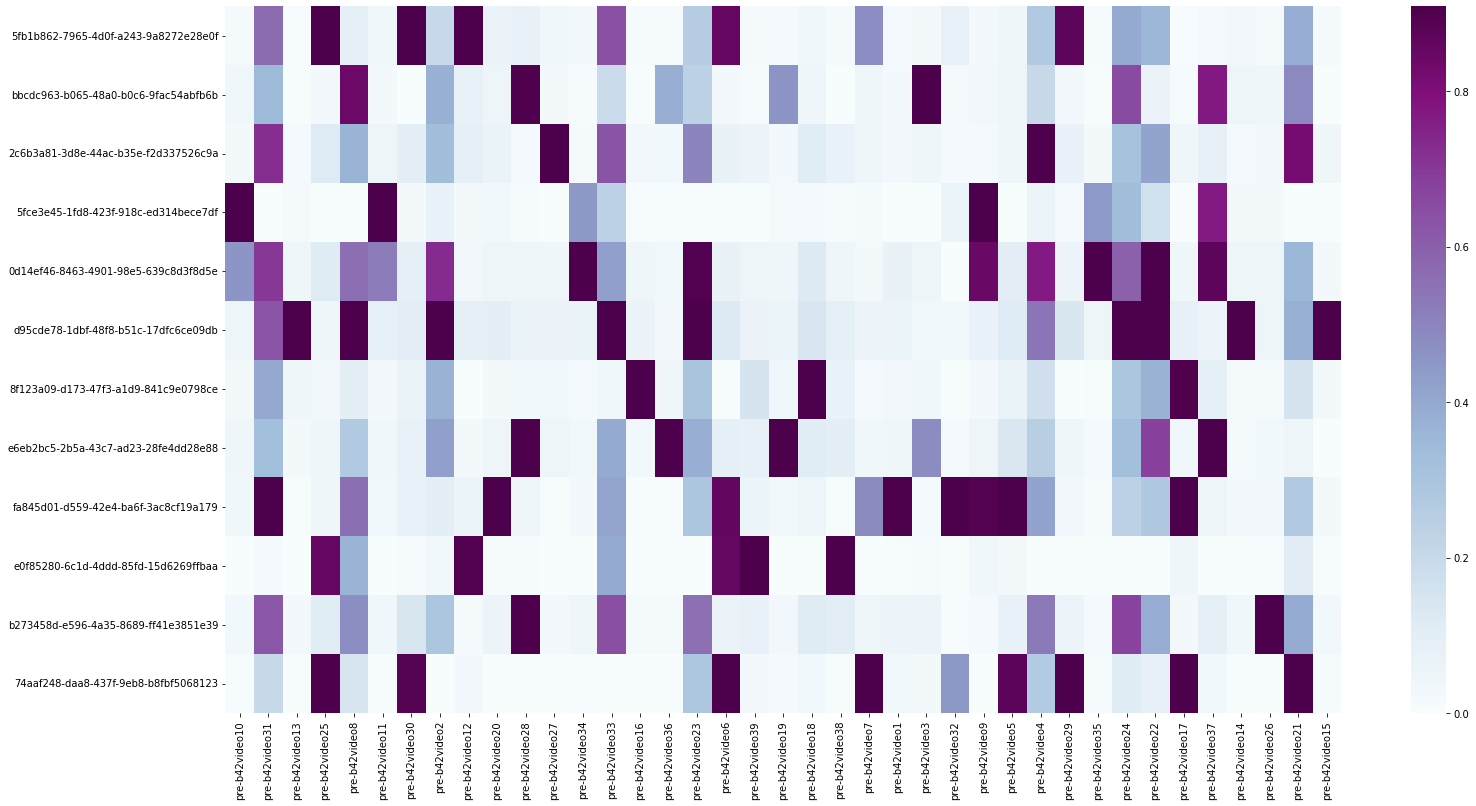

In [ ]:
fig = plt.figure(figsize=(25, 13))
sns.heatmap(df_normalized, cmap="BuPu")

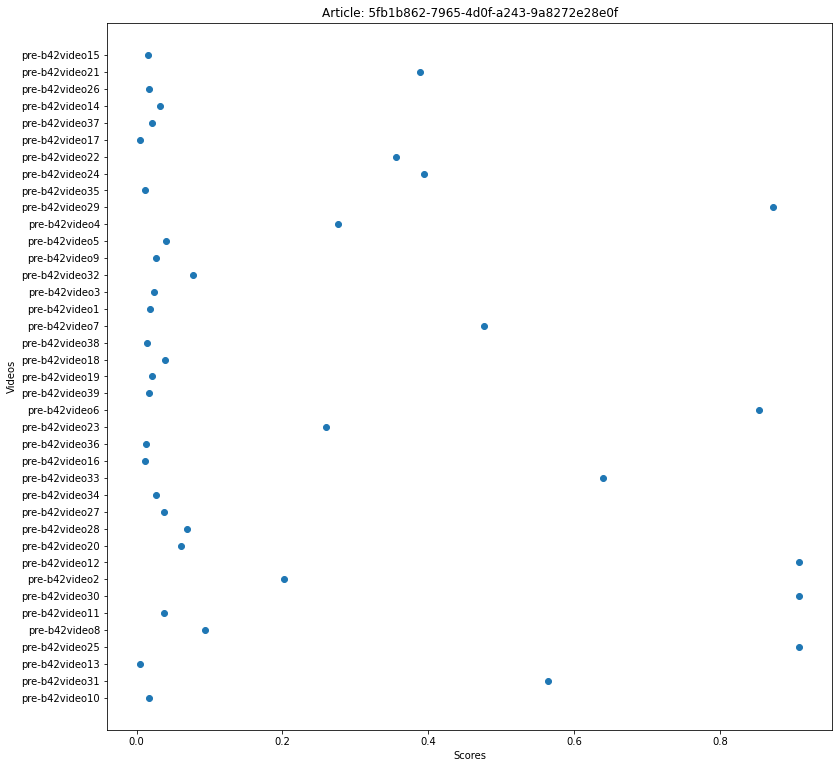

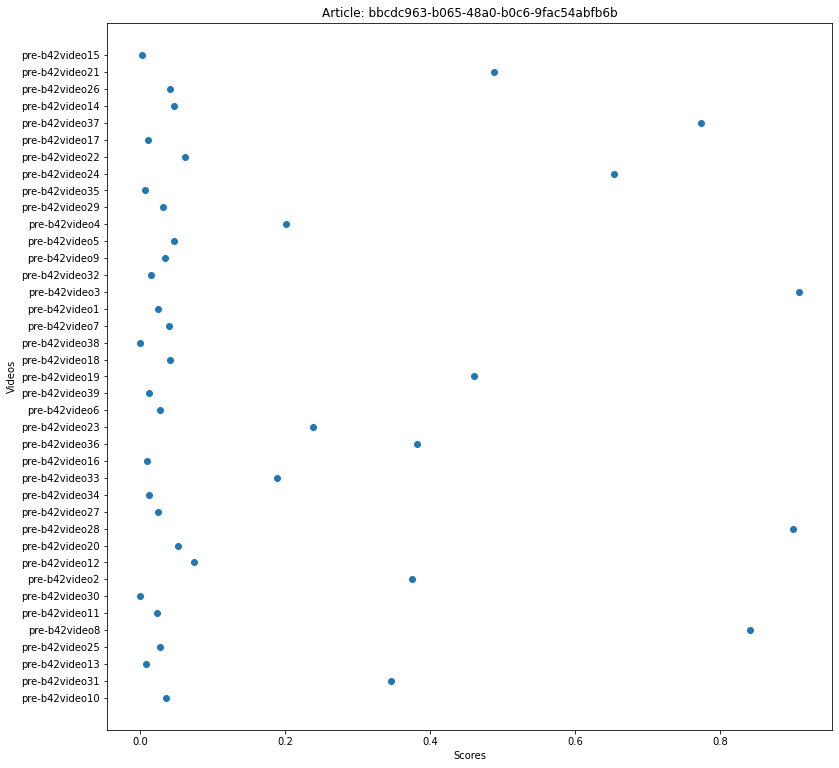

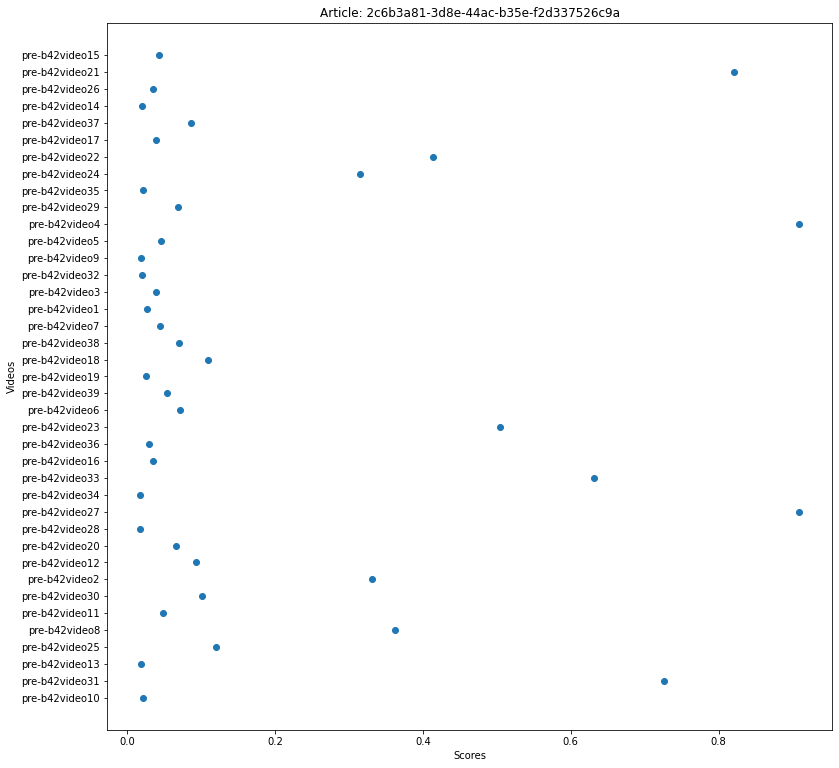

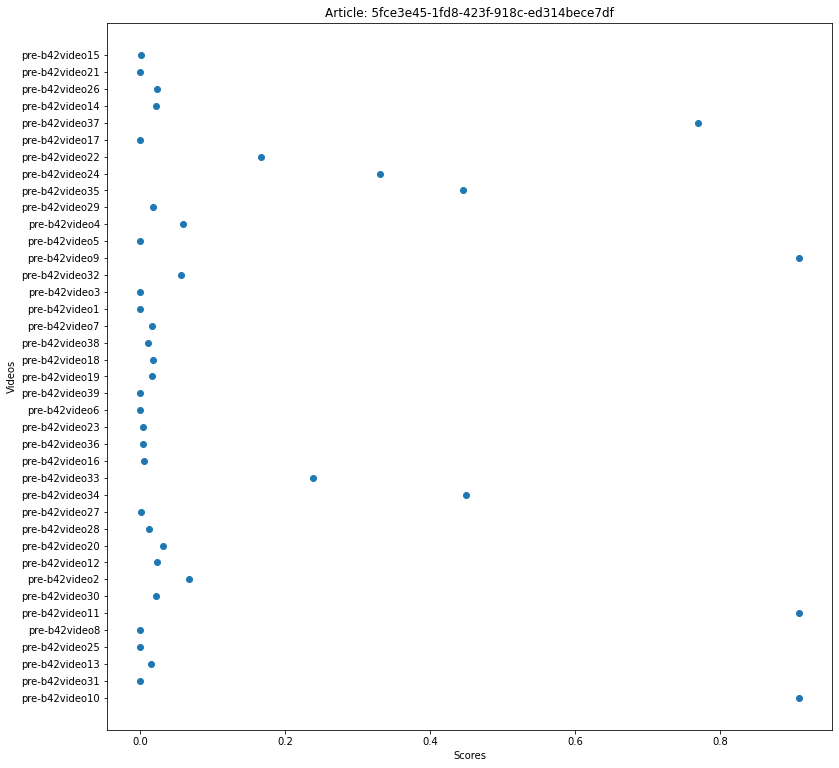

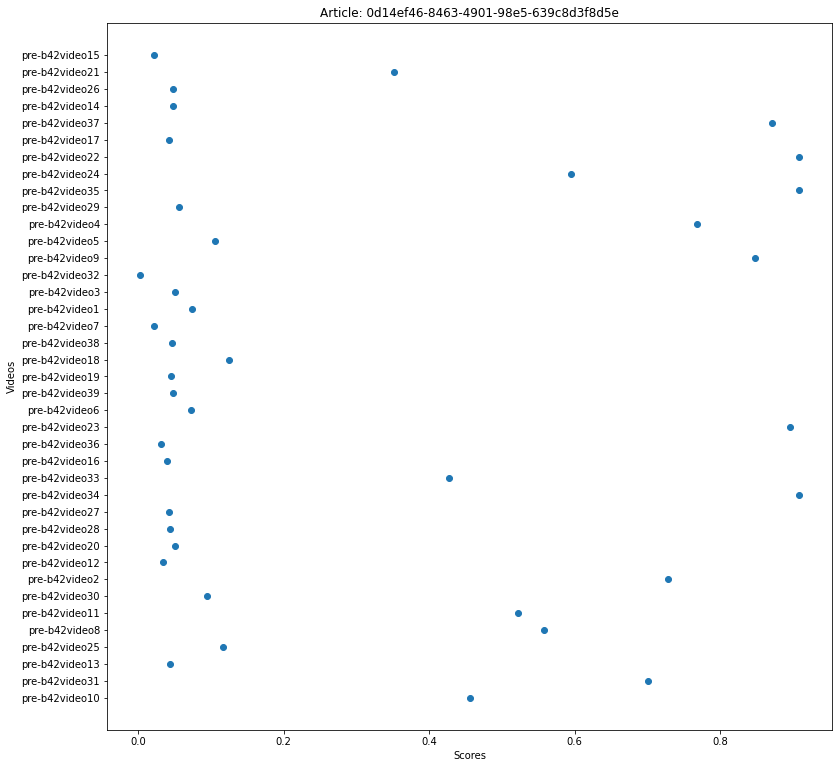

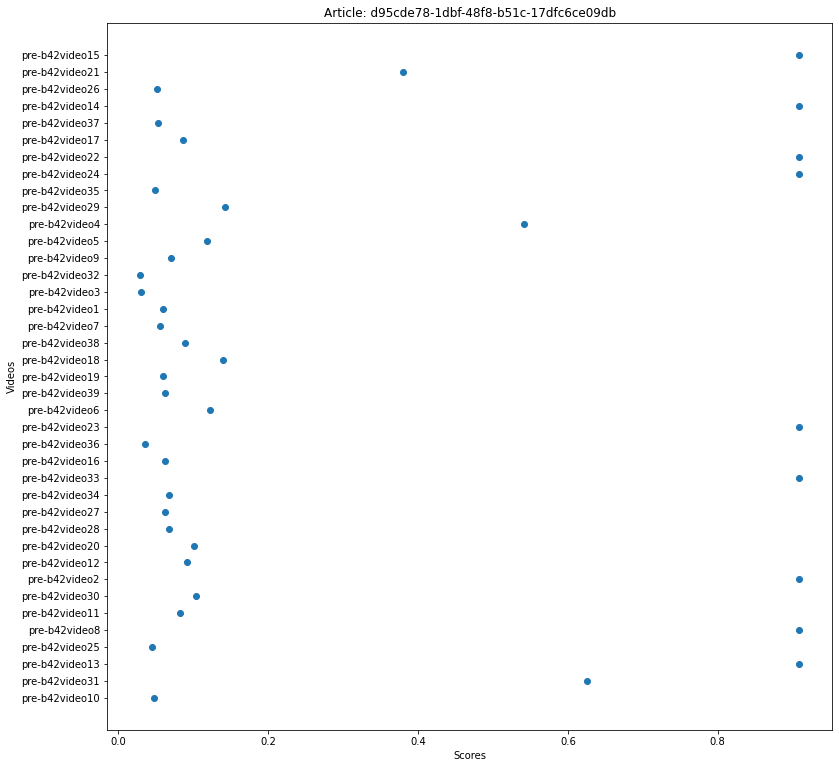

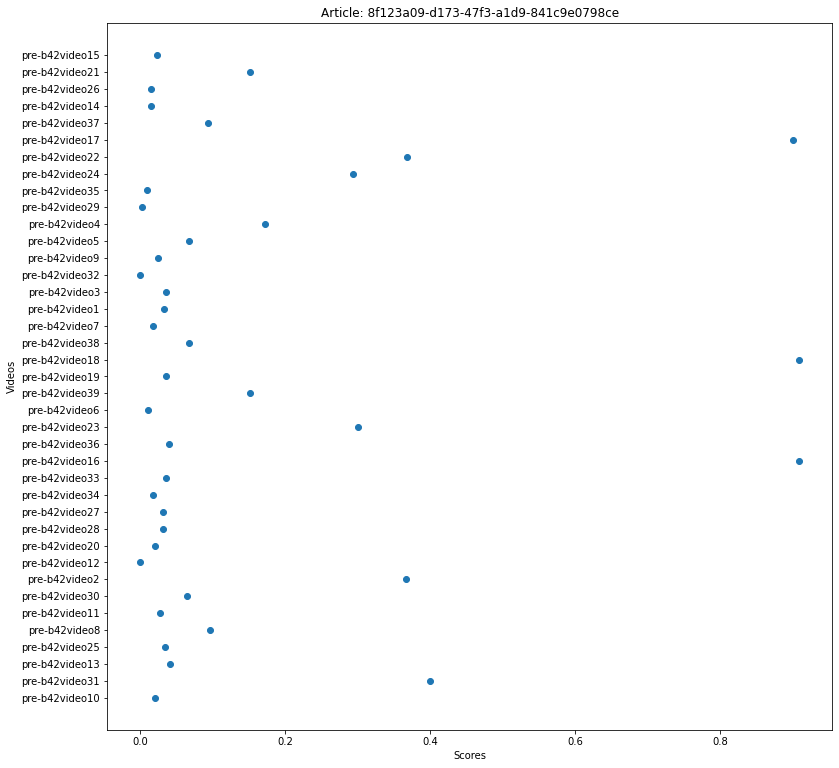

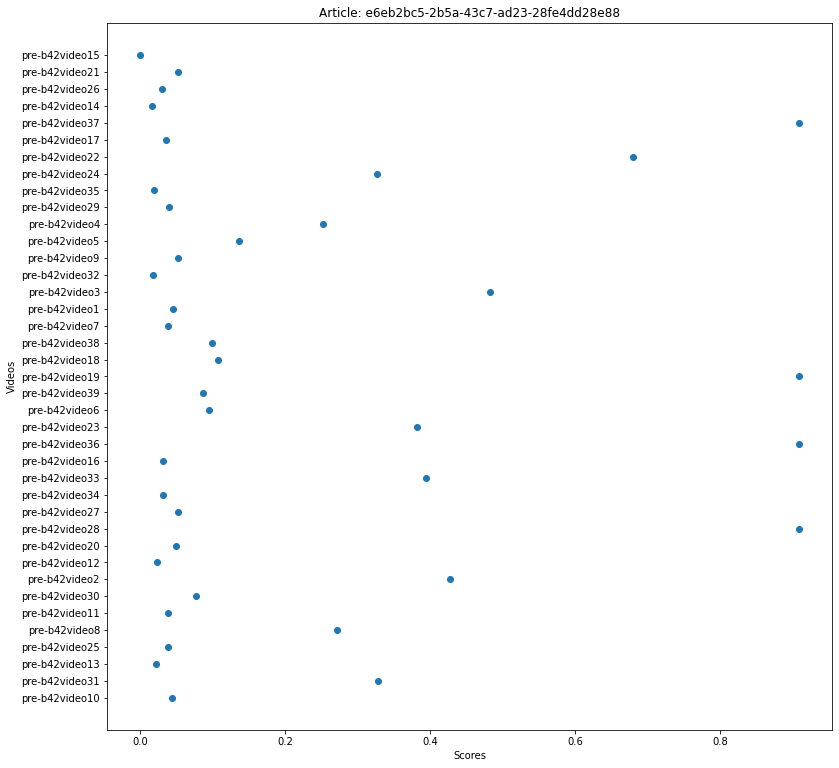

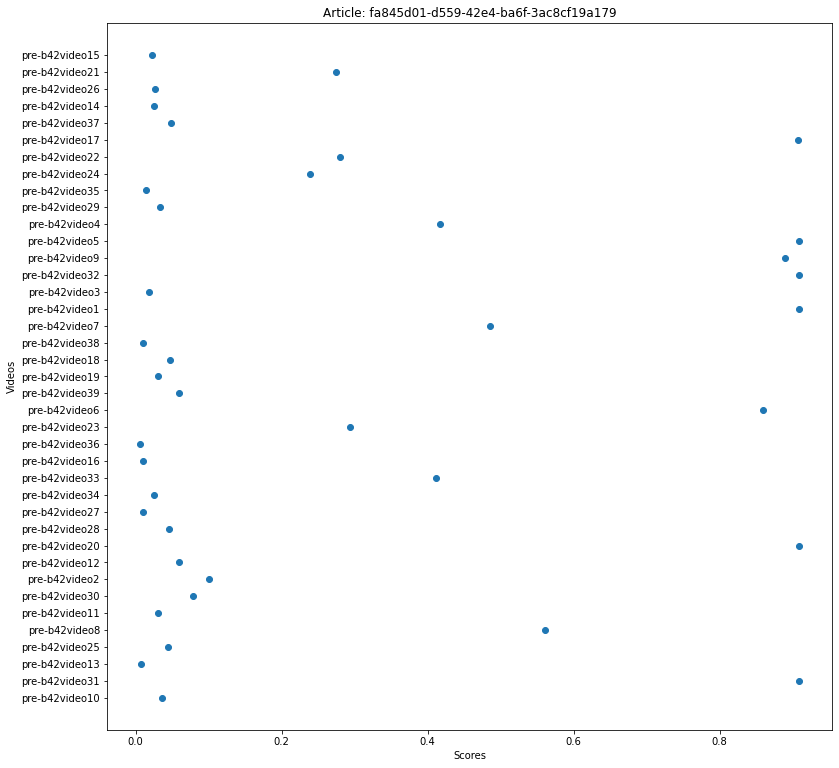

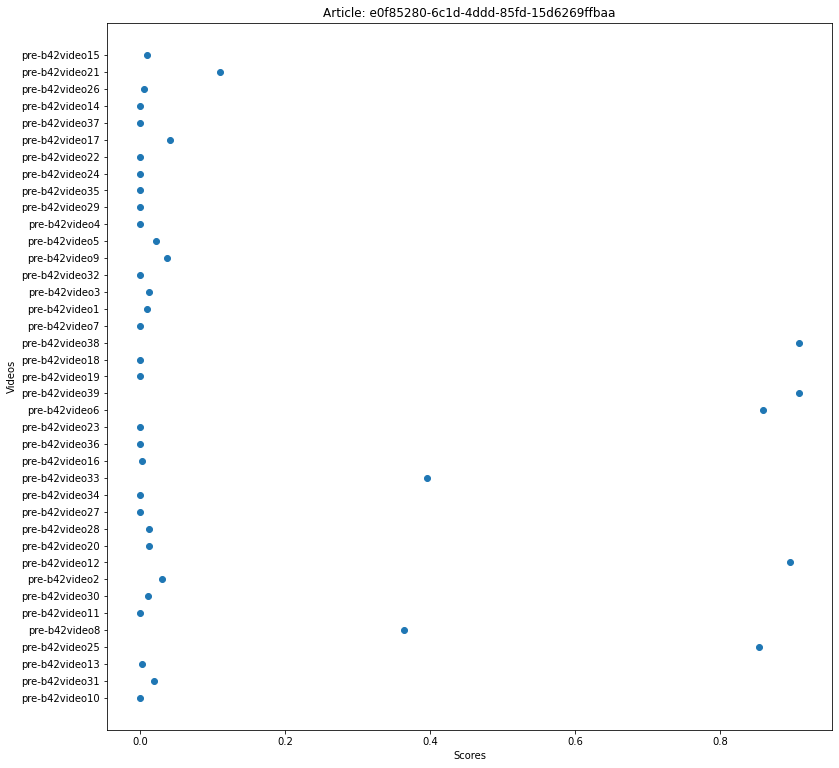

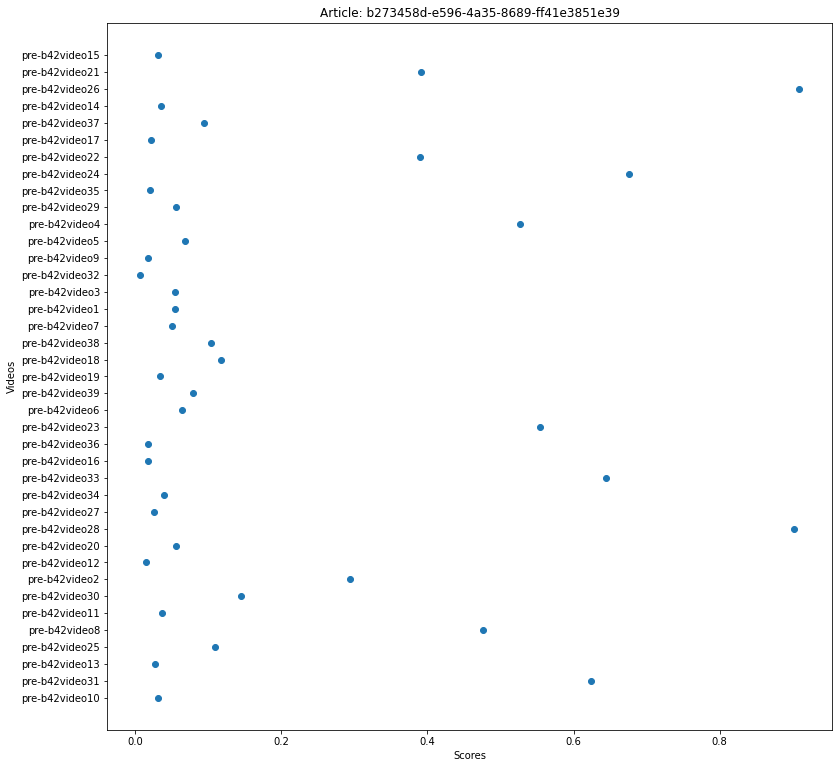

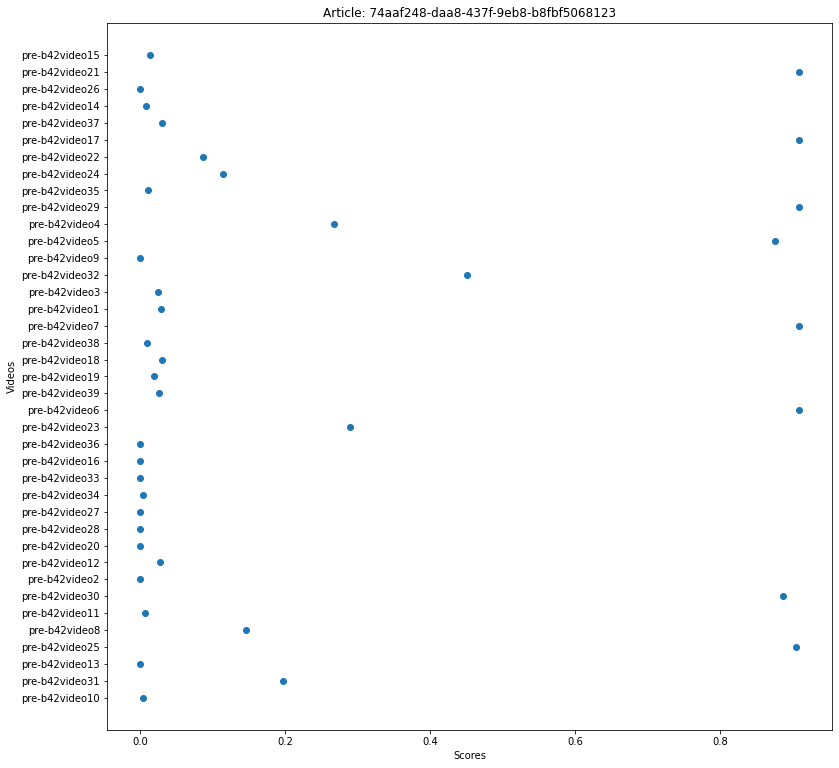

In [ ]:
for i, row in df_normalized.iterrows():
    fig = plt.figure(figsize=(13, 13))
    plt.scatter(row.values, df_normalized.columns)
    plt.title(f'Article: {i}')
    plt.xlabel('Scores')
    plt.ylabel('Videos')
    plt.gca().yaxis.set_label_position('left')
    plt.gca().yaxis.set_ticks_position('left')
    plt.show()

In [ ]:
df_processed = df_normalized.applymap(set_to_false)

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

df_processed

,pre-b42video10,pre-b42video31,pre-b42video13,pre-b42video25,pre-b42video8,pre-b42video11,pre-b42video30,pre-b42video2,pre-b42video12,pre-b42video20,pre-b42video28,pre-b42video27,pre-b42video34,pre-b42video33,pre-b42video16,pre-b42video36,pre-b42video23,pre-b42video6,pre-b42video39,pre-b42video19,pre-b42video18,pre-b42video38,pre-b42video7,pre-b42video1,pre-b42video3,pre-b42video32,pre-b42video9,pre-b42video5,pre-b42video4,pre-b42video29,pre-b42video35,pre-b42video24,pre-b42video22,pre-b42video17,pre-b42video37,pre-b42video14,pre-b42video26,pre-b42video21,pre-b42video15
5fb1b862-7965-4d0f-a243-9a8272e28e0f,False,False,False,0.909091,False,False,0.909091,False,0.909091,False,False,False,False,0.639501,False,False,False,0.853751,False,False,False,False,False,False,False,False,False,False,False,0.873318,False,False,False,False,False,False,False,False,False
bbcdc963-b065-48a0-b0c6-9fac54abfb6b,False,False,False,False,0.841426,False,False,False,False,False,0.900186,False,False,False,False,False,False,False,False,False,False,False,False,False,0.909091,False,False,False,False,False,False,0.653477,False,False,0.772887,False,False,False,False
2c6b3a81-3d8e-44ac-b35e-f2d337526c9a,False,0.725592,False,False,False,False,False,False,False,False,False,0.909091,False,0.631922,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.909091,False,False,False,False,False,False,False,False,0.820032,False
5fce3e45-1fd8-423f-918c-ed314bece7df,0.909091,False,False,False,False,0.909091,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.909091,False,False,False,False,False,False,False,0.769284,False,False,False,False
0d14ef46-8463-4901-98e5-639c8d3f8d5e,False,0.700449,False,False,False,False,False,0.72866,False,False,False,False,0.909091,False,False,False,0.896107,False,False,False,False,False,False,False,False,False,0.848622,False,0.767769,False,0.909091,False,0.908286,False,0.871801,False,False,False,False
d95cde78-1dbf-48f8-b51c-17dfc6ce09db,False,0.626004,0.909091,False,0.909091,False,False,0.909091,False,False,False,False,False,0.909091,False,False,0.909091,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.909091,0.909091,False,False,0.909091,False,False,0.909091
8f123a09-d173-47f3-a1d9-841c9e0798ce,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.909091,False,False,False,False,False,0.909091,False,False,False,False,False,False,False,False,False,False,False,False,0.899729,False,False,False,False,False
e6eb2bc5-2b5a-43c7-ad23-28fe4dd28e88,False,False,False,False,False,False,False,False,False,False,0.909091,False,False,False,False,0.909091,False,False,False,0.909091,False,False,False,False,False,False,False,False,False,False,False,False,0.679676,False,0.909091,False,False,False,False
fa845d01-d559-42e4-ba6f-3ac8cf19a179,False,0.909091,False,False,False,False,False,False,False,0.909091,False,False,False,False,False,False,False,0.85984,False,False,False,False,False,0.909091,False,0.909091,0.890026,0.909091,False,False,False,False,False,0.907135,False,False,False,False,False
e0f85280-6c1d-4ddd-85fd-15d6269ffbaa,False,False,False,0.853996,False,False,False,False,0.896388,False,False,False,False,False,False,False,False,0.858959,0.909091,False,False,0.909091,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


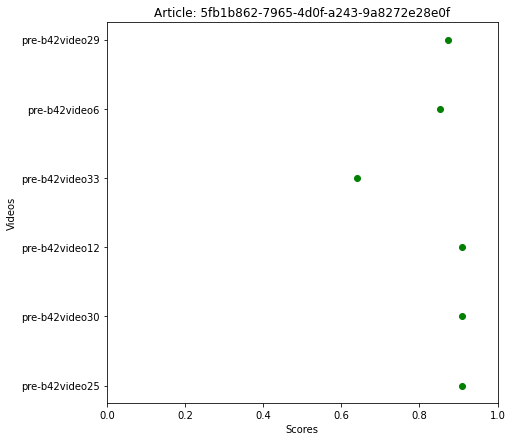

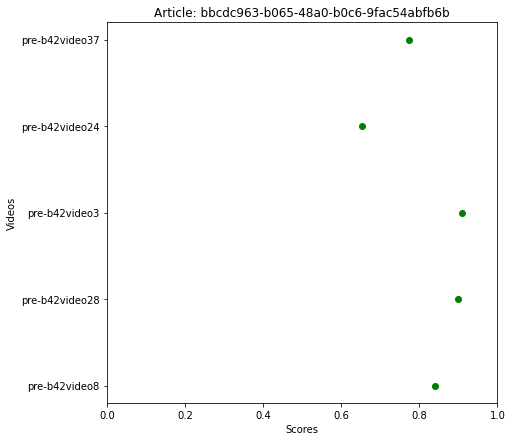

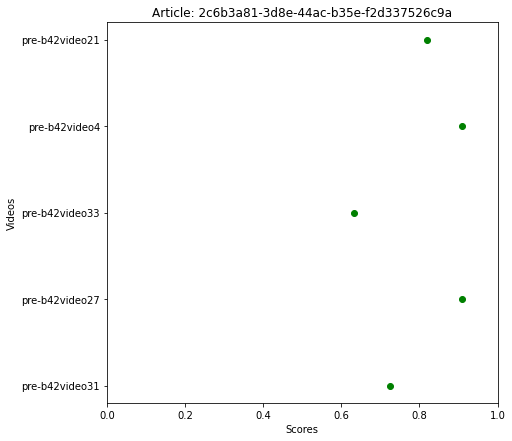

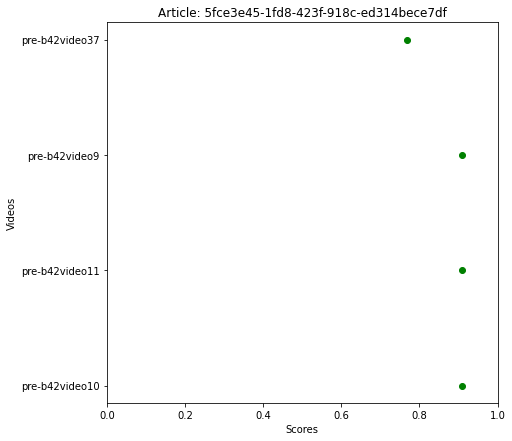

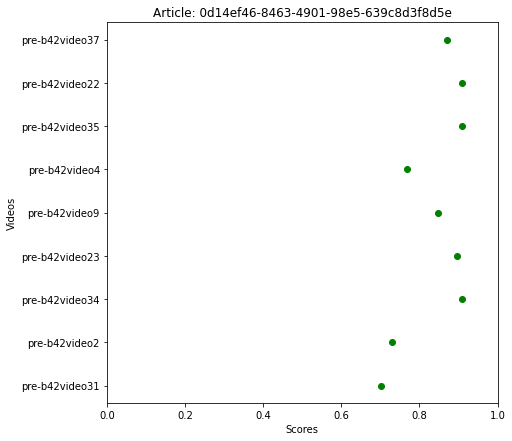

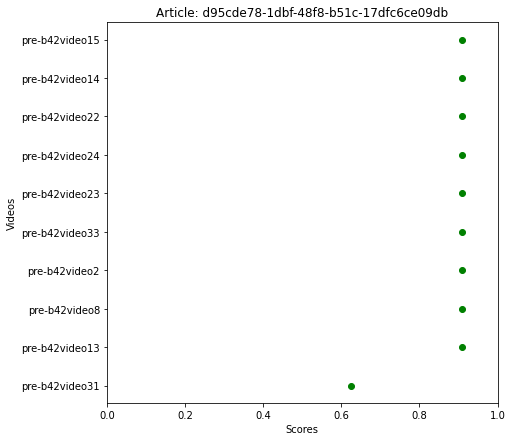

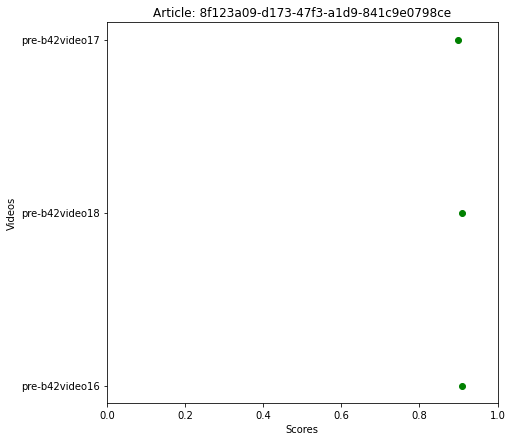

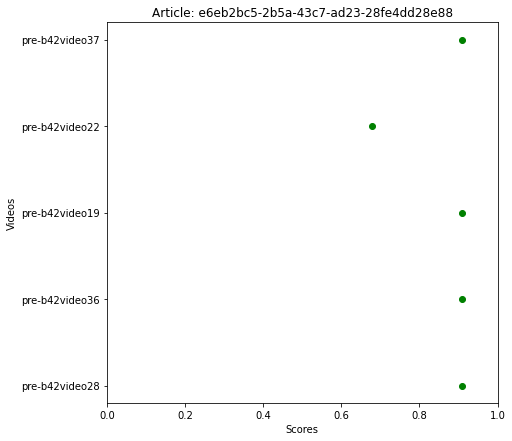

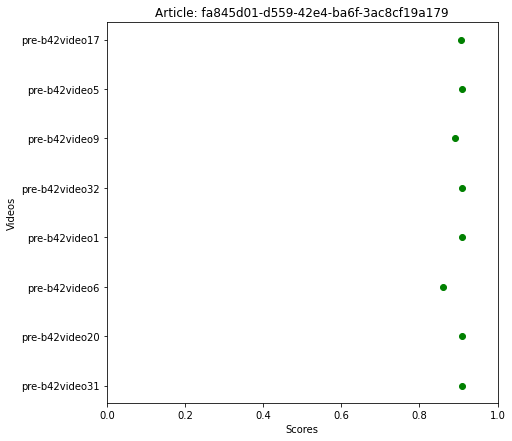

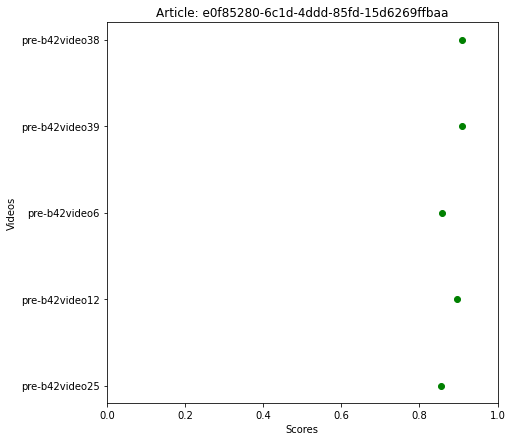

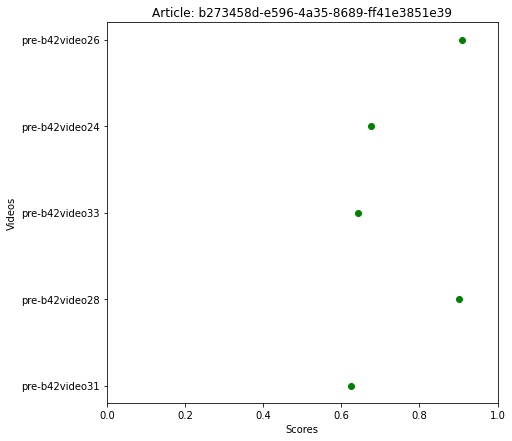

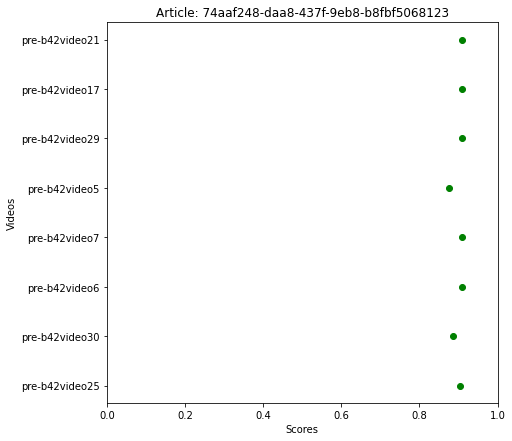

In [ ]:
for i, row in df_processed.iterrows():
    fig = plt.figure(figsize=(7, 7))
    # Create a boolean mask to exclude False values
    mask = row.values != False
    # Plot the values where mask is True
    plt.scatter(row.values[mask], df_processed.columns[mask], color='green')
    plt.title(f'Article: {i}')
    plt.xlabel('Scores')
    plt.ylabel('Videos')
    plt.gca().yaxis.set_label_position('left')
    plt.gca().yaxis.set_ticks_position('left')
    # Set the x-axis limits to 0 and 1
    plt.xlim(0, 1)
    plt.show()

# **Pass to json**

In [ ]:
# create the final Json
data = {}
for art_id in df_processed.index:
    data[art_id] = {}
    sorted_videos = df_processed.loc[art_id].sort_values(ascending=False).iloc[:3]
    for vid_id, score in sorted_videos.iteritems():
        data[art_id][vid_id] = {"score": score}
with open('data.json', 'w') as f:
    json.dump(data, f)

In [ ]:
data

{'5fb1b862-7965-4d0f-a243-9a8272e28e0f': {'pre-b42video30': {'score': 0.9090909090909091},
  'pre-b42video12': {'score': 0.9090909090909091},
  'pre-b42video25': {'score': 0.909090909090909}},
 'bbcdc963-b065-48a0-b0c6-9fac54abfb6b': {'pre-b42video3': {'score': 0.9090909090909091},
  'pre-b42video28': {'score': 0.9001857809356322},
  'pre-b42video8': {'score': 0.8414256724869833}},
 '2c6b3a81-3d8e-44ac-b35e-f2d337526c9a': {'pre-b42video27': {'score': 0.909090909090909},
  'pre-b42video4': {'score': 0.909090909090909},
  'pre-b42video21': {'score': 0.8200320899514254}},
 '5fce3e45-1fd8-423f-918c-ed314bece7df': {'pre-b42video10': {'score': 0.9090909090909091},
  'pre-b42video9': {'score': 0.9090909090909091},
  'pre-b42video11': {'score': 0.909090909090909}},
 '0d14ef46-8463-4901-98e5-639c8d3f8d5e': {'pre-b42video35': {'score': 0.9090909090909091},
  'pre-b42video34': {'score': 0.909090909090909},
  'pre-b42video22': {'score': 0.908285950160968}},
 'd95cde78-1dbf-48f8-b51c-17dfc6ce09db':